In [203]:
#importing the library
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA


In [252]:
# importing the data
col_names=[ 'Class','Alcohol','Malic_acid','Ash','Alkalinity_of_ash','Magnesium','Totalphenols','Flavanoids',
           'Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280','Proline'  ]

data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names=col_names, index_col=0)

data.reset_index(inplace=True)
data.head()

,Class,Alcohol,Malic_acid,Ash,Alkalinity_of_ash,Magnesium,Totalphenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [253]:
# to know the row nd column
data.shape

(178, 14)

In [254]:
#data dtypes
data.dtypes

Class                     int64
Alcohol                 float64
Malic_acid              float64
Ash                     float64
Alkalinity_of_ash       float64
Magnesium                 int64
Totalphenols            float64
Flavanoids              float64
Nonflavanoid_phenols    float64
Proanthocyanins         float64
Color_intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [208]:
# checking for the null values
data.isnull().sum()

Class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alkalinity_of_ash       0
Magnesium               0
Totalphenols            0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# Target variable Analysis

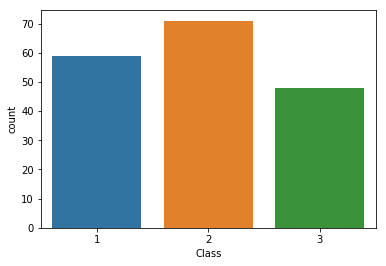

In [209]:
# Count plot for target variable
sns.countplot(data['Class'])
plt.show()

In [210]:
### Elbow method
ks=range(1,8)
inertia=[]

In [211]:
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(data)
    inertia.append(model.inertia_)

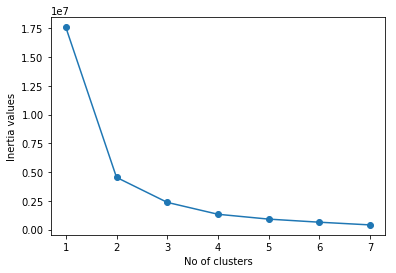

In [212]:
plt.plot(ks,inertia,'-o')
plt.xlabel('No of clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [213]:
models=KMeans(n_clusters=4,random_state=42)
models.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [214]:
labels=models.predict(data)
labels

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2])

In [215]:
# Finding the centroids
centroids=models.cluster_centers_
#centroids

In [216]:
data.head()

,Class,Alcohol,Malic_acid,Ash,Alkalinity_of_ash,Magnesium,Totalphenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


C:\Users\HEMNATH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


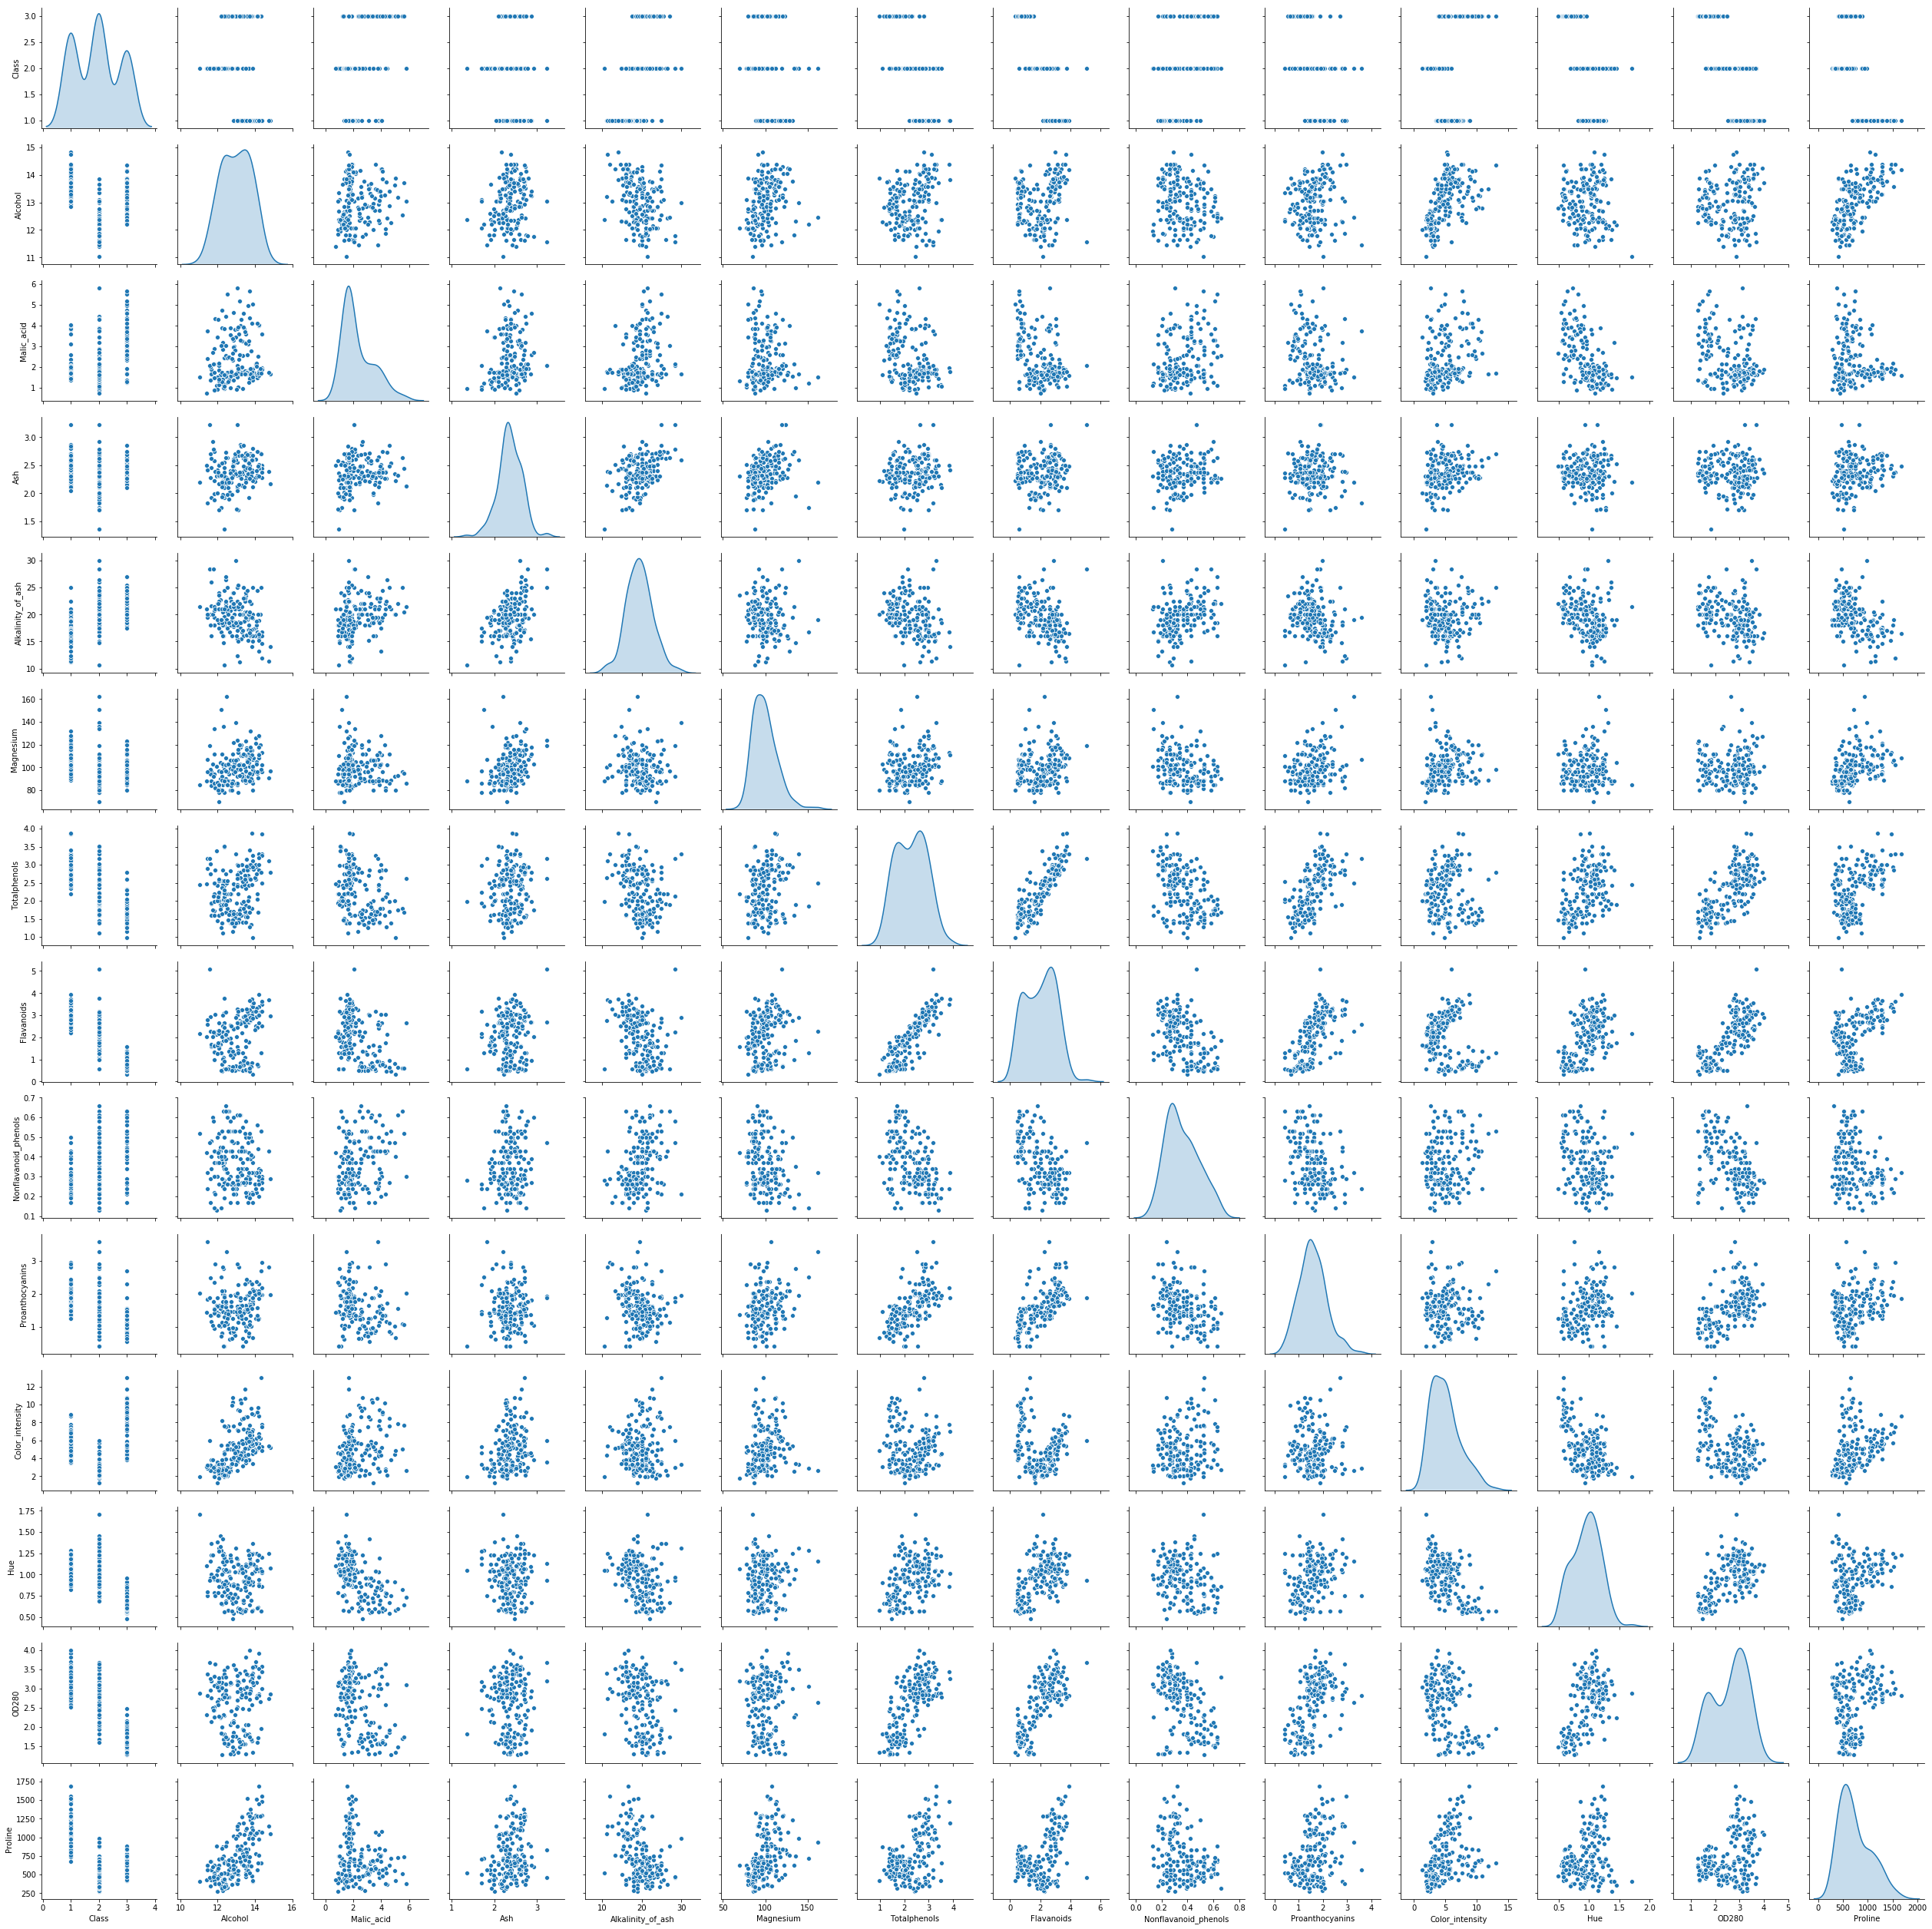

In [256]:
#pairplot
sns.pairplot(data,diag_kind='kde')
plt.show()

In [217]:
centroid_x=centroids[:,2]
centroid_y=centroids[:,10]


In [218]:
xs=data.iloc[:,2]
ys=data.iloc[:,10]

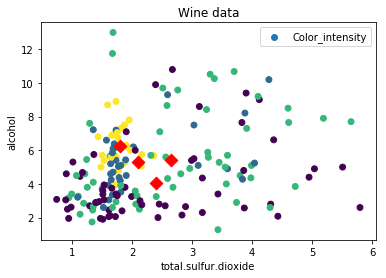

In [219]:
#plot the centroids with centroid location
import matplotlib.pyplot as plt
plt.scatter(xs,ys,c=labels,s=35)
plt.scatter(centroid_x,centroid_y,marker="D",c="r",s=80)
plt.title('Wine data')
plt.xlabel('total.sulfur.dioxide')
plt.ylabel('alcohol')
plt.legend()
plt.show()

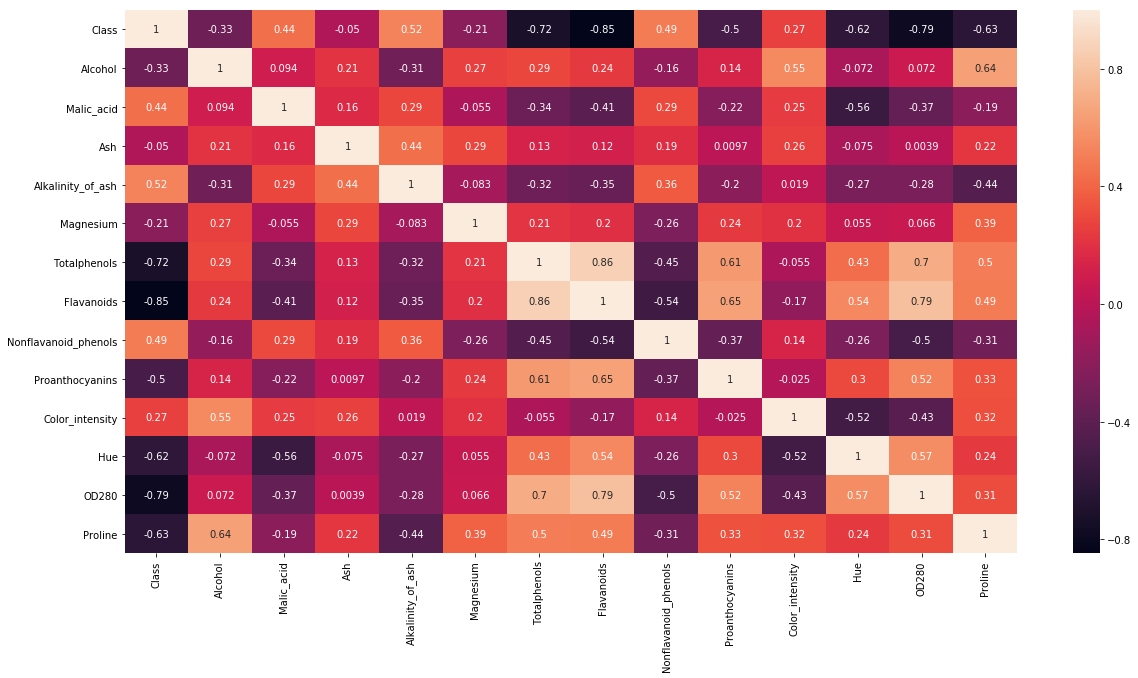

In [220]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [221]:
x=data.iloc[:,[2,10]].values

In [222]:
## finding the centroids
#x[labels==0,0]


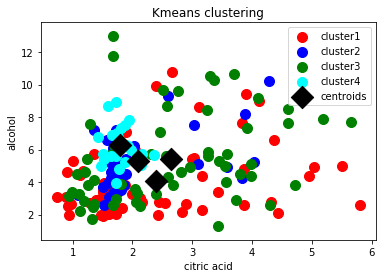

In [223]:
plt.scatter(x[labels==0,0],x[labels==0,1],s=100, c='red',label='cluster1')
plt.scatter(x[labels==1,0],x[labels==1,1],s=100, c='blue',label='cluster2')
plt.scatter(x[labels==2,0],x[labels==2,1],s=100, c='green',label='cluster3')
plt.scatter(x[labels==3,0],x[labels==3,1],s=100, c='cyan',label='cluster4')
plt.scatter(models.cluster_centers_[:,2],models.cluster_centers_[:,10],s=250,c='black',marker='D',label='centroids')
plt.title('Kmeans clustering')
plt.xlabel('citric acid')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [224]:
#importing the hierarchy
import scipy.cluster.hierarchy as sch

Text(0,0.5,'alcohol')

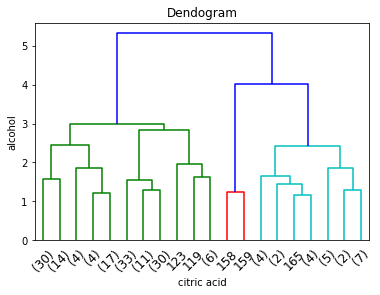

In [225]:
dendrogram=sch.dendrogram(sch.linkage(x,method='average'),orientation='top',truncate_mode='lastp',p=20,leaf_rotation=45)
plt.title('Dendogram')
plt.xlabel('citric acid')
plt.ylabel('alcohol')

In [226]:
model_h=AgglomerativeClustering(n_clusters=5,linkage='ward')

In [227]:
model_h

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [228]:
Hc = model_h.fit_predict(x)

In [229]:
Hc

array([2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       2, 0, 2, 3, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 4, 3, 3, 3, 3, 2, 3,
       2, 4, 3, 3, 3, 3, 4, 0, 0, 0, 3, 4, 3, 3, 3, 4, 0, 3, 3, 4, 4, 3,
       3, 3], dtype=int64)

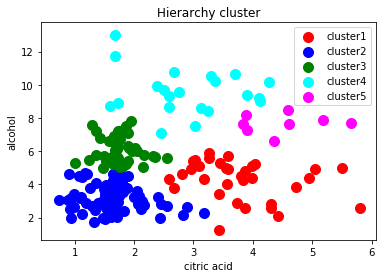

In [230]:
plt.scatter(x[Hc==0,0],x[Hc==0,1],s=100, c='red',label='cluster1')
plt.scatter(x[Hc==1,0],x[Hc==1,1],s=100, c='blue',label='cluster2')
plt.scatter(x[Hc==2,0],x[Hc==2,1],s=100, c='green',label='cluster3')
plt.scatter(x[Hc==3,0],x[Hc==3,1],s=100, c='cyan',label='cluster4')
plt.scatter(x[Hc==4,0],x[Hc==4,1],s=100, c='magenta',label='cluster5')
plt.title('Hierarchy cluster')
plt.xlabel('citric acid')
plt.ylabel('alcohol')
plt.legend()
plt.show()

# PCA

# Standardize the d-dimensional dataset.

In [231]:
##IDv's and DV's
x=data.drop('Class',axis=1)
y=data.Class

In [232]:
#find train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)


In [233]:
#apply standard scaler
sc=StandardScaler()
x_std_train=sc.fit_transform(x_train)
x_std_test=sc.transform(x_test)

C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HEMNATH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Construct the covariance matrix.

In [250]:
cov_mat = np.cov(x_std_train.T)
print(cov_mat.shape)

(13, 13)


# Decompose the covariance matrix into its eigenvectors and eigenvalues.

In [251]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[4.65457941 2.78138194 1.34764056 1.00159674 0.81463529 0.59946267
 0.50789798 0.09582909 0.15153678 0.19506792 0.35129461 0.30778318
 0.2969849 ]

Eigenvectors 
[[ 1.62041169e-01  4.69507531e-01  1.96851868e-01  1.00109932e-01
  -1.17832892e-01  2.30162782e-01  1.09448530e-01 -1.13996420e-01
  -3.86595881e-01 -3.46758918e-01  4.41826275e-01 -3.80664692e-01
   5.37106394e-02]
 [-2.25690837e-01  2.77781131e-01 -8.47317094e-02  4.20959794e-01
   4.18847779e-01  3.77014668e-01 -4.13871649e-01  4.66412045e-02
   1.42894609e-01  1.33228850e-01  7.84328252e-02  4.87144993e-02
  -3.87017321e-01]
 [ 5.12833872e-02  3.48685514e-01 -5.83629463e-01 -1.75970510e-01
  -1.31246691e-01  2.53494169e-01  6.30391341e-02 -1.46656677e-01
  -6.18392097e-02 -3.36814735e-01 -2.24354273e-01  4.76338237e-01
   5.22603707e-02]
 [-2.29096514e-01  2.71879482e-02 -6.55049957e-01 -4.30107382e-02
   4.83424770e-02 -1.10079073e-01  3.64224894e-01  1.04684072e-01
   6.14308165e-02  3.12432808e-01  3.5730

# Select k eigenvectors that correspond to the k largest eigenvalues,where k is the dimensionality of the new feature subspace ( k <= d ).


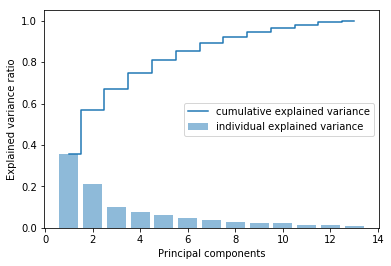

In [236]:
# sum of all eigen_values
tot = sum(eigen_vals)
# explained varience
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# cumulative explained varience
cum_var_exp = np.cumsum(var_exp)
#ploting in matplot
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# Construct a projection matrix W from the "top" k eigenvectors.

In [237]:
#combined eigen vectors
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs


[(4.654579410516491,
  array([ 0.16204117, -0.22569084,  0.05128339, -0.22909651,  0.14912699,
          0.40023874,  0.42970463, -0.2968195 ,  0.31407842, -0.03144797,
          0.27857011,  0.37233606,  0.3108756 ])),
 (2.7813819371028066,
  array([ 0.46950753,  0.27778113,  0.34868551,  0.02718795,  0.2895935 ,
          0.03719258, -0.02243891,  0.08698549,  0.03249752,  0.50982636,
         -0.295774  , -0.16803816,  0.33175864])),
 (1.3476405618031995,
  array([ 0.19685187, -0.08473171, -0.58362946, -0.65504996, -0.05087828,
         -0.10070152, -0.11572437, -0.14453579, -0.23502228,  0.1729334 ,
         -0.09125695, -0.15196482,  0.14415753])),
 (1.0015967389557334,
  array([ 0.10010993,  0.42095979, -0.17597051, -0.04301074, -0.64835166,
          0.22852215,  0.18368038,  0.17095096,  0.30265579,  0.10490244,
         -0.27969752,  0.21729718, -0.1278927 ])),
 (0.8146352870324728,
  array([-0.11783289,  0.41884778, -0.13124669,  0.04834248,  0.35930394,
         -0.02300684,

In [238]:
## we are reducing to 2 Principle Components so we take 2 rows of eig_matrix 
w= np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.16204117  0.46950753]
 [-0.22569084  0.27778113]
 [ 0.05128339  0.34868551]
 [-0.22909651  0.02718795]
 [ 0.14912699  0.2895935 ]
 [ 0.40023874  0.03719258]
 [ 0.42970463 -0.02243891]
 [-0.2968195   0.08698549]
 [ 0.31407842  0.03249752]
 [-0.03144797  0.50982636]
 [ 0.27857011 -0.295774  ]
 [ 0.37233606 -0.16803816]
 [ 0.3108756   0.33175864]]


# Transform the d-dimensional input dataset x using the projection matrix W to obtain the new k-dimensional feature subspace

In [255]:
# obtaining new k dimensional
x_std_train[0].dot(w)

array([3.40377786, 1.38288492])

In [240]:
# 
X_train_pca = x_std_train.dot(w)

In [247]:
x_std_train.shape

(124, 13)

In [246]:
w.shape

(13, 2)

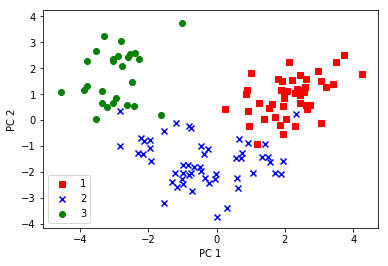

In [245]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):plt.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l,1], 
 c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.show()